In [59]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this project
import csv
import copy
import pandas
from pandas import DataFrame

# Loading Crash Data

Extract document id, crash date one hour range, municipality name, location type from csv file named "2022crashdata.csv" and store in the dictionary for further use

In [60]:
# process csv file function from previous assignment
def process_csv(filename):
        example_file = open(filename, encoding="utf-8")
        example_reader = csv.reader(example_file)
        example_data = list(example_reader)
        example_file.close()
        return example_data

In [61]:
#import csv file
new_file = process_csv("2022crashdata.csv")

In [62]:
#get_raw_data function will extract value from data and return a dictionary that stored the useful value
def get_raw_data(data):
    crash_dic = {}
    crash_dic['document_id'] = []
    crash_dic['crashdate'] = []
    crash_dic['ntfyhour'] = []
    crash_dic['muniname'] = []
    crash_dic['loctype'] = []
    for i in range(len(data)):   
        crash_dic['document_id'].append(data[i][0]) #document number
        crash_dic['crashdate'].append(data[i][2]) #date of the crash
        crash_dic['ntfyhour'].append(int(data[i][3]))  # the one hour range in which the enformcement agency was notified of 
        #the crash listed in military time.
        crash_dic['muniname'].append(data[i][5]) #municipality name
        crash_dic['loctype'].append(data[i][7]) # location of crash: i for intersection
        
    # n for non-intersection, pl for parking lot and pp for private property
    return crash_dic


In [63]:
#store the useful value in crash_dic
title = new_file[0]
data = new_file[1:]
crash_dic = get_raw_data(data)

In [64]:
def get_decode_data(data):
    decode_data = {}
    decode_data['Number'] = []
    decode_data['Month'] = []
    decode_data['Loctype'] = []
    decode_data['LoctypeWord'] = []
    decode_data['Hwyclass'] = []
    decode_data['HwyclassWord'] = []
    decode_data['Injury'] = []
    decode_data["InjuryWord"] = []
    for i in range(len(data)):
        decode_data['Number'].append(int(data[i][0]))
        decode_data['Month'].append(data[i][1])
        decode_data['Loctype'].append(data[i][2])
        decode_data['LoctypeWord'].append(data[i][3])
        decode_data['Hwyclass'].append(data[i][4])
        decode_data['HwyclassWord'].append(data[i][5])
        decode_data['Injury'].append(data[i][6])
        decode_data['InjuryWord'].append(data[i][7])
    return decode_data
        

In [65]:
code_file = process_csv("decode.csv")
code_data = code_file[1:]
decode_data = get_decode_data(code_data)

# Municipality Crash data
Find crash data for each municipality and sorted the value to find the 10 municipalities that have most crashes data.

Plot bar plot for the data

**Q1 find the number of crashes happen in each municipality**

In [66]:
muni_statistic = {} #store the value of crashes in municipality in a dic that key is the name of the municipality and value is the 
#number of crashes for that municipality
for i in crash_dic['muniname']:
    if i not in muni_statistic:
        muni_statistic[i] = 1
    else:
        muni_statistic[i] += 1
muni_statistic

{'MADISON': 3658,
 'BLOOMING GROVE': 43,
 'SHOREWOOD HILLS': 74,
 'MC FARLAND': 87,
 'COTTAGE GROVE': 152,
 'BURKE': 233,
 'MONONA': 327,
 'ALBION': 127,
 'FITCHBURG': 493,
 'WESTPORT': 165,
 'MONTROSE': 67,
 'VERONA': 286,
 'SPRINGDALE': 71,
 'MAZOMANIE': 48,
 'SPRINGFIELD': 196,
 'ROXBURY': 42,
 'SUN PRAIRIE': 572,
 'OREGON': 118,
 'WINDSOR': 129,
 'DUNN': 108,
 'BLACK EARTH': 21,
 'VERMONT': 17,
 'BLUE MOUNDS': 67,
 'CROSS PLAINS': 98,
 'BERRY': 33,
 'PRIMROSE': 23,
 'MIDDLETON': 462,
 'VIENNA': 132,
 'DEERFIELD': 87,
 'DANE': 32,
 'PERRY': 17,
 'YORK': 60,
 'WAUNAKEE': 156,
 'RUTLAND': 106,
 'BROOKLYN': 111,
 'BRISTOL': 254,
 'MOUNT HOREB': 98,
 'MEDINA': 62,
 'WEST POINT': 21,
 'PLEASANT SPRINGS': 103,
 'DE FOREST': 141,
 'DUNKIRK': 40,
 'CAMBRIDGE': 20,
 'CHRISTIANA': 78,
 'STOUGHTON': 208,
 'ROCKDALE': 1,
 'MARSHALL': 43,
 'GREEN BAY': 934,
 'SCOTT': 201,
 'HOWARD': 418,
 'HUMBOLDT': 26,
 'ASHWAUBENON': 542,
 'LADYSMITH': 58,
 'FLAMBEAU': 26,
 'THORNAPPLE': 14,
 'GRANT': 77,
 'D

**Q2 find the top 10 municipality in the order of their crashes data from most to least**

In [67]:
sorted_muni_statistic = dict(sorted(muni_statistic.items(), key=lambda item: item[1],reverse = True))
top_10_muni = {}
count = 0
for i in sorted_muni_statistic:
    if count == 10:
        break;
    else:
        top_10_muni[i] = sorted_muni_statistic[i]
        count = count + 1
top_10_muni

{'MILWAUKEE': 17472,
 'MADISON': 3658,
 'KENOSHA': 2042,
 'RACINE': 1927,
 'LA CROSSE': 1892,
 'WEST ALLIS': 1709,
 'EAU CLAIRE': 1588,
 'OSHKOSH': 1521,
 'WAUKESHA': 1515,
 'JANESVILLE': 1505}

**Q3 draw bar plot for the top 10 manucipality**

Text(0, 0.5, 'crashes number')

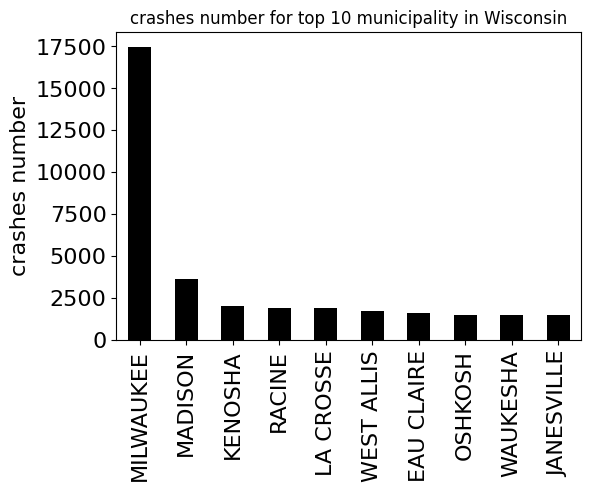

In [68]:
ax = pandas.Series(top_10_muni).plot.bar(color="black", fontsize=16, figsize=(4 + len(top_10_muni)//4, 4),title = "crashes number for top 10 municipality in Wisconsin")
ax.set_ylabel("crashes number", fontsize=16)

# Find statistics for ntfyhour and analyze the value

find min, max, mean and median vlaue for ntfyhour to see the enformcement agency respond time

**Q4 find the mean, max, and min value for the one hour range in which the enformcement agency was notified of the crash listed in military time**

In [69]:
ntfyHour = crash_dic['ntfyhour'] #make a list to store the ntfyhour

mean_ntfyHour = (sum(ntfyHour)/len(ntfyHour)) #mean value of the time
mean_ntfyHour = float("{:.2f}".format(mean_ntfyHour)) #format to be two decimal
max_ntfyHour = max(ntfyHour) # max value of time
min_ntfyHour = min(ntfyHour) #min value of time
print("The mean time is {}, the max time is {}, and the min time is {} ".format(mean_ntfyHour, max_ntfyHour,min_ntfyHour))

The mean time is 13.08, the max time is 23, and the min time is 0 


**Q5 find the median value of the ntfyHour**

In [70]:
ntfyHour = sorted(ntfyHour)
median_ntfyHour = None

if len(ntfyHour)%2 == 1: #check if the length is odd number
    median_ntfyHour = ntfyHour[floor(len(ntfyHour)/2)]
else:
    median_ntfyHour = ntfyHour[len(ntfyHour)//2]
    median_ntfyHour += ntfyHour[(len(ntfyHour)//2)-1]
    median_ntfyHour = median_ntfyHour/2
median_ntfyHour

14.0

# Date Time
analyze crash data based on the date the crashes happen

1.plot the total crashes each month

2.Find the month with max total crashes and month with min total crashes

In [71]:
#Date to time 
#function from previous assignment 5
def get_year(date):
    """get_year(date) returns the year when the date is the in the 'mm/dd/yyyy' format"""
    date = date.split("/")
    return int(date[2])

def get_day(date):
    """get_year(date) returns the day when the date is the in the 'mm/dd/yyyy' format"""
    date = date.split("/")
    return int(date[1])

def get_month(date):
    """get_year(date) returns the month when the date is the in the 'mm/dd/yyyy' format"""
    date = date.split("/")
    return int(date[0])

**Q6 store the value of crashes data for each month in dictionary
Key will be the month and the value will be the number of total crashes that month**

In [72]:
def monthCode(month):
    #transfer number to January, February, March, April, 
    #May, June, July, August, September, October, November, and December
    index = decode_data['Number'].index(month)
    return decode_data['Month'][index]

In [73]:
month_dic = {} #month dictionary

for i in crash_dic['crashdate']:
    month = monthCode(get_month(i))
    if month not in month_dic:
        month_dic[month] = 1
    else:
        month_dic[month] += 1
month_dic = dict(sorted(month_dic.items(), key=lambda item: item[1],reverse = True))      
month_dic

{'December': 13443,
 'November': 13382,
 'October': 11715,
 'January': 11459,
 'June': 10687,
 'September': 10318,
 'May': 10056,
 'February': 10015,
 'July': 9877,
 'August': 9857,
 'March': 9232,
 'April': 8789}

**Q7 Sort the dictionary by the number of crash data and plot the value**

Text(0, 0.5, 'crashes number')

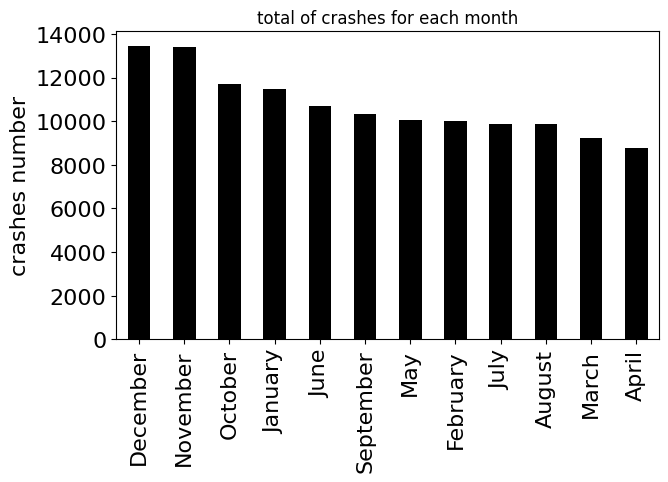

In [74]:
#sort the month dictionary by its value
month_statistic = dict(sorted(month_dic.items(), key=lambda item: item[1],reverse = True))
ax = pandas.Series(month_statistic).plot.bar(color="black", fontsize=16, figsize=(4 + len(month_statistic)//4, 4),title = "total of crashes for each month")
ax.set_ylabel("crashes number", fontsize=16)

**Q8 Find the months that has max and min crashes**

In [75]:
max_month = max(month_dic.items(), key=lambda item: item[1]) # max value of time
min_month = min(month_dic.items(), key=lambda item: item[1]) #min value of time
print("The month with maximum crashes is {}, the number of crashes is {} ".format(max_month[0],max_month[1]))
print("The month with minimum crashes is {}, the number of crashes is {} ".format(min_month[0],min_month[1]))

The month with maximum crashes is December, the number of crashes is 13443 
The month with minimum crashes is April, the number of crashes is 8789 


# Analyze the number of crashes for Madison
 find out the number of crashes  for each month in Madison municipality
 
 find out the number of crashes for each day in Madison municipality


**Q9 Create a dictionary that only have the crash data for Madison munipality for each month
Key is the month, and the value is the number of crashes in Madison munipality in that month**

In [76]:
crash_month_Madison = {}
current_month = None
current_muni = None

for i in range(len(crash_dic['muniname'])):
    if(crash_dic['muniname'][i] == "MADISON"):
        current_month = monthCode(get_month(crash_dic['crashdate'][i]))
        if current_month not in crash_month_Madison:
            crash_month_Madison[current_month] = 1
        else:
            crash_month_Madison[current_month] += 1
            
crash_month_Madison

{'July': 315,
 'November': 330,
 'December': 375,
 'January': 278,
 'February': 270,
 'March': 271,
 'June': 281,
 'October': 318,
 'August': 339,
 'April': 266,
 'May': 294,
 'September': 321}

**Q10 Create a dictionary that only have the crash data for Madison munipality for each day
Key is the day, and the value is the number of crashes in Madison munipality in that day**

In [77]:
crash_day_Madison = {}
current_day = None
current_muni = None

for i in range(len(crash_dic['muniname'])):
    if(crash_dic['muniname'][i] == "MADISON"):
        current_day = get_day(crash_dic['crashdate'][i])
        if current_day not in crash_day_Madison:
            crash_day_Madison[current_day] = 1
        else:
            crash_day_Madison[current_day] += 1
            
crash_day_Madison

{16: 117,
 22: 141,
 15: 159,
 10: 93,
 23: 147,
 28: 126,
 7: 136,
 25: 111,
 9: 126,
 5: 117,
 11: 102,
 3: 113,
 8: 116,
 20: 122,
 19: 143,
 14: 115,
 2: 100,
 21: 113,
 29: 122,
 26: 108,
 1: 116,
 4: 94,
 12: 117,
 6: 113,
 30: 95,
 18: 115,
 17: 116,
 27: 126,
 24: 147,
 13: 115,
 31: 77}

# Analyze the location where crashes happened.
Abbreviation for LOCTYPE:

I- Intersection(public roadway)

N – Non-intersection (public roadway) 

PL – Parking lot 

PP – Private Property

**Q11 Find out which type of location had the most crashes in 2022 and how many crashes happened 
in that location**

In [78]:
#loc_type_decode
def loc_type_decode(loc):
    if loc not in decode_data['Loctype']:
        return "Unknown type"
    index = decode_data['Loctype'].index(loc)
    return decode_data['LoctypeWord'][index]

In [79]:
loc_type = {}
count = 0
for i in crash_dic['loctype']:
    i = loc_type_decode(i)
    if i not in loc_type:
        loc_type[i] = 1
    else:
        loc_type[i] += 1
max_type = max(sorted(loc_type.items()), key = lambda t:t[1])
max_type

('Non-intersection(public roadway) ', 76391)

In [80]:
def cell(row_idx, col_name):
    col_idx = title.index(col_name)
    val = data[row_idx][col_idx]

    if val.strip() == "":
        return None
    if col_name in ["LATDECDG", "LONDECDG"]:
        try:
            val = float(val)
        except ValueError:
            print(f"Warning: Unable to convert {col_name} value '{val}' to float at row {row_idx}.")
            return None
     
    return val


**Q12 What is the latitude of the 572th crash?**

In [81]:
print(cell(572,'LATDECDG'))

43.114408168


**Q13 Create a dataframe for the precise location of crashes with lattitude and longitude**

In [82]:
crash_lat = {}
crash_lon = {}
for i in range(len(data)):
    if cell(i,'LATDECDG') == None or cell(i,'LONDECDG') == None:
        continue
    else:
        crash_lat[i] = cell(i,'LATDECDG')
        crash_lon[i] = cell(i,'LONDECDG')
crash_lat = pandas.Series(crash_lat) 
crash_lon = pandas.Series(crash_lon)
df = DataFrame({'Lattitude':crash_lat,'Longitude':crash_lon})
df

,Lattitude,Longitude
0,43.037016,-89.390930
2,43.035365,-89.432469
4,43.072505,-89.404078
5,43.075306,-89.450823
6,43.047481,-89.473558
...,...,...
128825,45.451201,-92.551061
128826,45.451698,-92.570094
128827,45.453313,-92.461417
128828,45.452236,-92.550408


**Q14 Generate the scatter plot of the locations**

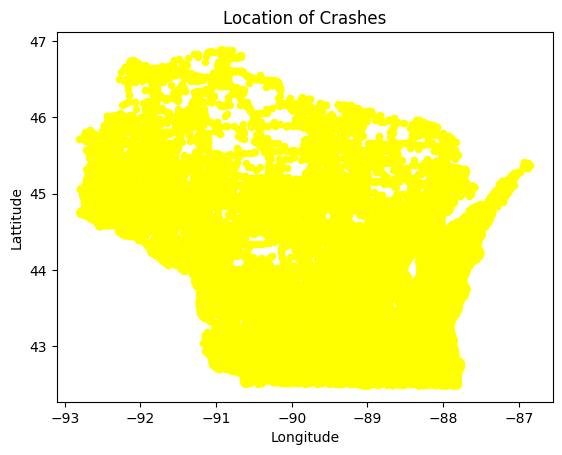

In [83]:
ax = df.plot.scatter(x = 'Longitude', y = 'Lattitude',color = 'yellow')
ax.set_title('Location of Crashes')
None

**Q15 What are the types of roads that crashes took place? And which type of road had the most crashes?**

In [84]:
#decode hwyclass type:
def hwyclass_decode(hwyclass):
    index = decode_data['Hwyclass'].index(hwyclass)
    return decode_data['HwyclassWord'][index]

In [85]:
road_type = []
for i in range(len(data)):
    road_type.append(hwyclass_decode(data[i][title.index('HWYCLASS')]))
road_type = list(set(road_type))
road_type

['Interstate Hwy Rural',
 'Interstate Hwy Urban',
 'City Street Urban ',
 'County Trunk Rural',
 'County Trunk Urban',
 'City Street Rural',
 'State Highway Rural',
 'State Highway Urban',
 'Town Road Rural']

In [86]:
road_type_count = {}

for i in range(len(data)):
    hwyclass_value = hwyclass_decode(data[i][title.index('HWYCLASS')])

    if hwyclass_value not in road_type_count:
        road_type_count[hwyclass_value] = 1
    else:
        road_type_count[hwyclass_value] += 1
largest_road_type = max(road_type_count, key=road_type_count.get)
largest_road_type

'City Street Urban '

# Analyze the injury

**Q16 What are the levels of injury severity and how many are they?**

In [87]:
#decode injury level
def injury_level(injury):
    index = decode_data['Injury'].index(injury)
    return decode_data['InjuryWord'][index]

In [88]:
injury_severity = []
for i in range(len(data)):
    injury_severity.append(injury_level(data[i][title.index('INJSVR')]))
injury_severity = list(set(injury_severity))
injury_severity

['No Apparent Injury ',
 'Fatal Injury ',
 'Possible Injury ',
 'Suspected Minor Injury ',
 'Suspected Serious Injury ']

In [89]:
injury_severity_count = {}

for i in range(len(data)):
    injury_value = injury_level(data[i][title.index('INJSVR')])

    if injury_value not in injury_severity_count:
        injury_severity_count[injury_value] = 1
    else:
        injury_severity_count[injury_value] += 1
largest_injury_severity = max(injury_severity_count, key=injury_severity_count.get)
injury_severity_count

{'Possible Injury ': 10938,
 'No Apparent Injury ': 103212,
 'Suspected Minor Injury ': 11393,
 'Suspected Serious Injury ': 2740,
 'Fatal Injury ': 547}

**Q17 Generate a bar plot for injury severity**

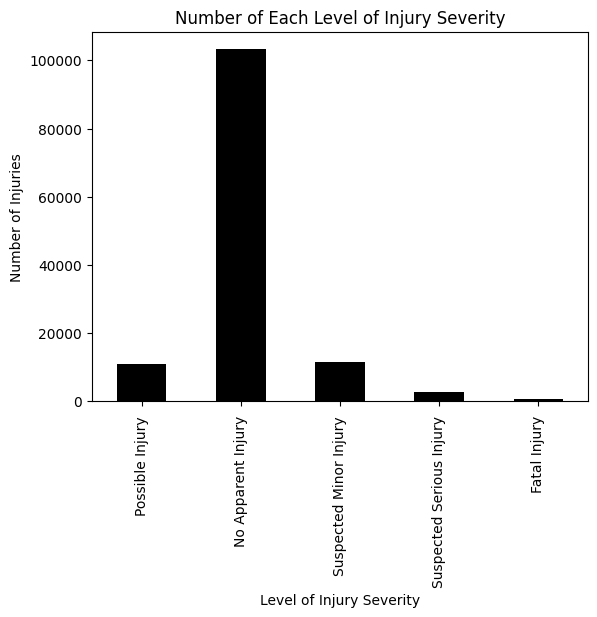

In [90]:
s = pandas.Series(injury_severity_count)
ax = s.plot.bar(color = 'k')
ax.set_ylabel('Number of Injuries')
ax.set_xlabel('Level of Injury Severity')
ax.set_title('Number of Each Level of Injury Severity')
None

**Q18 How many veh involved in the crashes in 2022 in WI? And what is the average number of vehicles involed in crashes per county?**

In [91]:
count = 0
for i in range(len(data)):
    count += int(data[i][title.index('TOTVEH')])
print("total crashes happened in Wisconsin state in 2022 is",count)
county_num = []
for i in range(len(data)):
    if data[i][title.index('CNTYNAME')] not in county_num:
        county_num.append(data[i][title.index('CNTYNAME')])
avg_veh_per_county = count / len(county_num)
print("average crashes happen in each county in 2022 in WI state is:",avg_veh_per_county)

total crashes happened in Wisconsin state in 2022 is 214109
average crashes happen in each county in 2022 in WI state is: 2973.7361111111113


**Q19 Alcohol is one of the most severe factor that causes crashes, how many crashes involved with alcohol? What is average crahsed invovled with alcohol per county?**

In [92]:
alcohol_count = 0
for i in range(len(data)):
    if data[i][title.index('ALCFLAG')] == 'Y':
        alcohol_count += 1
print("crashes involved alcohol is: ",alcohol_count)
print("percentage of crashes involved alcohol is:",(alcohol_count/count)*100,"%")
county_num = []
for i in range(len(data)):
    if data[i][title.index('CNTYNAME')] not in county_num:
        county_num.append(data[i][title.index('CNTYNAME')])
avg_alco_per_county = alcohol_count / len(county_num)
print("average crashed involved with alcohol per county is:",avg_alco_per_county)

crashes involved alcohol is:  6230
percentage of crashes involved alcohol is: 2.909732893059143 %
average crashed involved with alcohol per county is: 86.52777777777777


**Q20 Generate a bar plot of crashes involved with alcohol for each county**

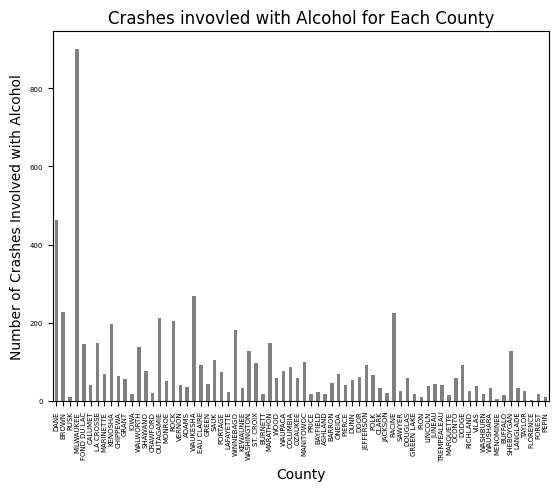

In [93]:
county_alco = {}
for i in range(len(data)):
    if data[i][title.index('ALCFLAG')] == 'Y':
        if data[i][title.index('CNTYNAME')] not in county_alco:
            county_alco[data[i][title.index('CNTYNAME')]] = 1
        else:
            county_alco[data[i][title.index('CNTYNAME')]] += 1
s = pandas.Series(county_alco)
ax = s.plot.bar(color = 'grey',fontsize = 5 )
ax.set_ylabel('Number of Crashes Involved with Alcohol')
ax.set_xlabel('County')
ax.set_title('Crashes invovled with Alcohol for Each County')
None